<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-5/blob/main/Entrega1_Reto_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: TC4029.10 Ciencia y analitica de datos**
###Tecnológico de Monterrey

**Profr. Dra. María de la Paz Rico Fernández**

###**Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans**

**EQUIPO 5:**

* **Laura Irán González Ojeda**
 *	Matrícula: A01794099

* **Marcela Alejandra Rosales Jiménez**
 *	 Matrícula: A01032022

Fecha de entrega: 16 de Noviembre de 2022


In [1]:
#Importación de Librerías
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import random

In [2]:
#Descarga de la Base de datos de calidad de agua
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
filename = url.split('/')
req = requests.get(url)
zipfile= zipfile.ZipFile(BytesIO(req.content))

In [3]:
#Extracción del conjunto de datos
zipfile.extractall('/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo')

In [4]:
df_subterraneas = pd.read_csv("/content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding="cp1252")
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [5]:
print("Aguas subterraneas:", df_subterraneas.isna().sum())

Aguas subterraneas: CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG             

##**Limpieza de datos**

Eliminamos la columna SDT_mg/L ya que todos sus valores con NaN.

In [6]:
df_subterraneas.drop(columns=["SDT_mg/L"], inplace=True)

Eliminamos la columna CLAVEA ya que puede interferir en el análisis y tiene un valor distinto para cada renglón.

In [7]:
df_subterraneas["CLAVE"].value_counts()

DLAGU6         1
OCGCE3209      1
OCFSU2993      1
OCFSU2994      1
OCFSU3048      1
              ..
DLHID6458      1
DLHID6461      1
DLHID6463      1
DLHID6467      1
OCRBR5109M1    1
Name: CLAVE, Length: 1068, dtype: int64

In [8]:
df_subterraneas.drop(columns=["CLAVE"], inplace=True)

In [9]:
df_subterraneas.shape

(1068, 55)

In [10]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1064 non-null   float64
 10  CALIDAD_ALC           1064 non-null   object 
 11  CONDUCT_mS/cm         1062 non-null   float64
 12  CALIDAD_CONDUC        1062 non-null   object 
 13  SDT_M_mg/L            1066 non-null   object 
 14  CALIDAD_SDT_ra        1066 non-null   object 
 15  CALIDAD_SDT_salin    

###**Normalización del conjunto de datos**

A continuación, se realizará un proceso de limpieza de datos enfocado a eliminar los valores nulos detectados en algunas columnas; así como la normalización de los datos que contengan valores atípicos para evitar la pérdida de información.

In [11]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0
ALC_mg/L,4
CALIDAD_ALC,4
CONDUCT_mS/cm,6
CALIDAD_CONDUC,6
SDT_M_mg/L,2
CALIDAD_SDT_ra,2
CALIDAD_SDT_salin,2
DUR_mg/L,1
CALIDAD_DUR,1
N_NO3_mg/L,1


Rellenamos los registros vacíos de las columnas: 
- ALC_mg/L con el promedio
- CALIDAD_ALC con la moda

In [12]:
# Funcion para rellenar valores NaN con numeros aleatorios

def fill_random(column_val):
    if np.isnan(column_val) == True: 
        column_val = random.uniform(start, stop)
    else:
         column_val = column_val
    return column_val

In [13]:
promedio_alc_mgl = df_subterraneas["ALC_mg/L"].mean()
df_subterraneas['ALC_mg/L'] = df_subterraneas['ALC_mg/L'].fillna(promedio_alc_mgl)

In [14]:
mode_calidad_alc = df_subterraneas["CALIDAD_ALC"].mode()[0]
df_subterraneas['CALIDAD_ALC'] = df_subterraneas['CALIDAD_ALC'].replace(np.nan, mode_calidad_alc)

In [15]:
fill_var = df_subterraneas["CONDUCT_mS/cm"].mean()
df_subterraneas['CONDUCT_mS/cm'] = df_subterraneas['CONDUCT_mS/cm'].fillna(fill_var)

In [16]:
fill_var = df_subterraneas["CALIDAD_CONDUC"].mode()[0]
df_subterraneas['CALIDAD_CONDUC'] = df_subterraneas['CALIDAD_CONDUC'].replace(np.nan, fill_var)

In [17]:
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].replace("<25", np.nan)
df_subterraneas["SDT_M_mg/L"] = df_subterraneas["SDT_M_mg/L"].astype(float)
fill_var = df_subterraneas["SDT_M_mg/L"].mean()
df_subterraneas['SDT_M_mg/L'] = df_subterraneas['SDT_M_mg/L'].replace(np.nan, fill_var)

In [18]:
fill_var = df_subterraneas["CALIDAD_SDT_ra"].mode()[0]
df_subterraneas['CALIDAD_SDT_ra'] = df_subterraneas['CALIDAD_SDT_ra'].replace(np.nan, fill_var)

In [19]:
fill_var = df_subterraneas["CALIDAD_SDT_salin"].mode()[0]
df_subterraneas['CALIDAD_SDT_salin'] = df_subterraneas['CALIDAD_SDT_salin'].replace(np.nan, fill_var)

In [20]:
fill_var = df_subterraneas["CALIDAD_DUR"].mode()[0]
df_subterraneas['CALIDAD_DUR'] = df_subterraneas['CALIDAD_DUR'].replace(np.nan, fill_var)

In [21]:
fill_var = df_subterraneas["CALIDAD_N_NO3"].mode()[0]
df_subterraneas['CALIDAD_N_NO3'] = df_subterraneas['CALIDAD_N_NO3'].replace(np.nan, fill_var)

In [22]:
df_subterraneas['CONTAMINANTES'] = df_subterraneas['CONTAMINANTES'].replace(np.nan, "Desconocido")

In [23]:
# DUR_mg/L contiene un renglón con valor NaN y 26 valores string.
# Vamos a ponerle a esos 27 valores el promedio de esa columna de los valores <20.
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].replace("<20", np.nan)
df_subterraneas["DUR_mg/L"] = df_subterraneas["DUR_mg/L"].astype(float)
start = 0
stop = 19
df_subterraneas['DUR_mg/L'] = df_subterraneas['DUR_mg/L'].apply(fill_random)

In [24]:
# Se procederá a relizar el mismo proceso anterior para normalizar los datos con <0.20
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].replace("<0.02", np.nan)
df_subterraneas["N_NO3_mg/L"] = df_subterraneas["N_NO3_mg/L"].astype(float)
start = 0.0
stop = 0.019
df_subterraneas['N_NO3_mg/L'] = df_subterraneas['N_NO3_mg/L'].apply(fill_random)

In [25]:
#Eliminamos los caracteres especiales '<' de las columnas numericas para evitar la pérdida de información
columns = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL', 'N_NO3_mg/L','AS_TOT_mg/L',
          'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

df_subterraneas[columns] = df_subterraneas[columns].replace({'<':''}, regex=True)


In [26]:
df_subterraneas['SEMAFORO'] = df_subterraneas['SEMAFORO'].replace({'Verde':'1', 'Amarillo':'2', 'Rojo':'3'}, regex=True)

In [27]:
tmp = df_subterraneas.isna().sum().to_frame()
tmp[tmp[0]>0]

,0


In [28]:
#Identificación de columnas Numéricas y Categóricas
col_numericas = [
    "ALC_mg/L",
    "SDT_M_mg/L",
    'FLUORUROS_mg/L',
    'DUR_mg/L',  
    'COLI_FEC_NMP/100_mL',
    'N_NO3_mg/L',
    'AS_TOT_mg/L',
    'CD_TOT_mg/L',
    'CR_TOT_mg/L',
    'HG_TOT_mg/L',
    'PB_TOT_mg/L',
    'MN_TOT_mg/L',
    'FE_TOT_mg/L',
    'SEMAFORO'
]

col_string = [    
    'CONTAMINANTES'
]

col_categoricas = [
 
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO', 
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE'
]

In [29]:
#Cambio del tipo de dato Object a Float en variables definidas como numéricas 
df_subterraneas[col_numericas]= df_subterraneas[col_numericas].astype('float')

#Cambio del tipo de dato Object a Category en variables definidas como categóricas 
df_subterraneas[col_categoricas] = df_subterraneas[col_categoricas].astype('category')

In [30]:
df_subterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SITIO                 1068 non-null   object  
 1   ORGANISMO_DE_CUENCA   1068 non-null   object  
 2   ESTADO                1068 non-null   object  
 3   MUNICIPIO             1068 non-null   object  
 4   ACUIFERO              1068 non-null   object  
 5   SUBTIPO               1068 non-null   category
 6   LONGITUD              1068 non-null   float64 
 7   LATITUD               1068 non-null   float64 
 8   PERIODO               1068 non-null   int64   
 9   ALC_mg/L              1068 non-null   float64 
 10  CALIDAD_ALC           1068 non-null   category
 11  CONDUCT_mS/cm         1068 non-null   float64 
 12  CALIDAD_CONDUC        1068 non-null   category
 13  SDT_M_mg/L            1068 non-null   float64 
 14  CALIDAD_SDT_ra        1068 non-null   category
 15  CALI

##**Exploración de los datos**

describe(), mean(), plot, boxplot de pandas

###**Tendencias centrales promedio, media y mediana de los datos**

In [31]:
#Describe
df_subterraneas.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.919502,1.075600,347.412883,355.490356,4.315073,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,1.955993
std,6.703263,3.887670,0.0,116.655014,1242.056683,2748.821149,1.924278,359.843105,2052.457014,8.342600,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.876076
min,-116.664250,14.561150,2020.0,26.640000,50.400000,101.200000,0.200000,2.269958,1.100000,0.000009,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.950000,0.267175,120.956900,1.100000,0.646229,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000
50%,-102.174180,22.617190,2020.0,215.825000,822.500000,553.000000,0.503500,245.175900,1.100000,2.080766,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,2.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,3.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,3.000000


In [32]:
#mean
df_subterraneas.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


LONGITUD               -101.891007
LATITUD                  23.163618
PERIODO                2020.000000
ALC_mg/L                235.633759
CONDUCT_mS/cm          1138.953013
SDT_M_mg/L              896.919502
FLUORUROS_mg/L            1.075600
DUR_mg/L                347.412883
COLI_FEC_NMP/100_mL     355.490356
N_NO3_mg/L                4.315073
AS_TOT_mg/L               0.019618
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013276
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005282
MN_TOT_mg/L               0.072478
FE_TOT_mg/L               0.410387
SEMAFORO                  1.955993
dtype: float64

###**Medidas de dispersión, máximo, mínimo**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

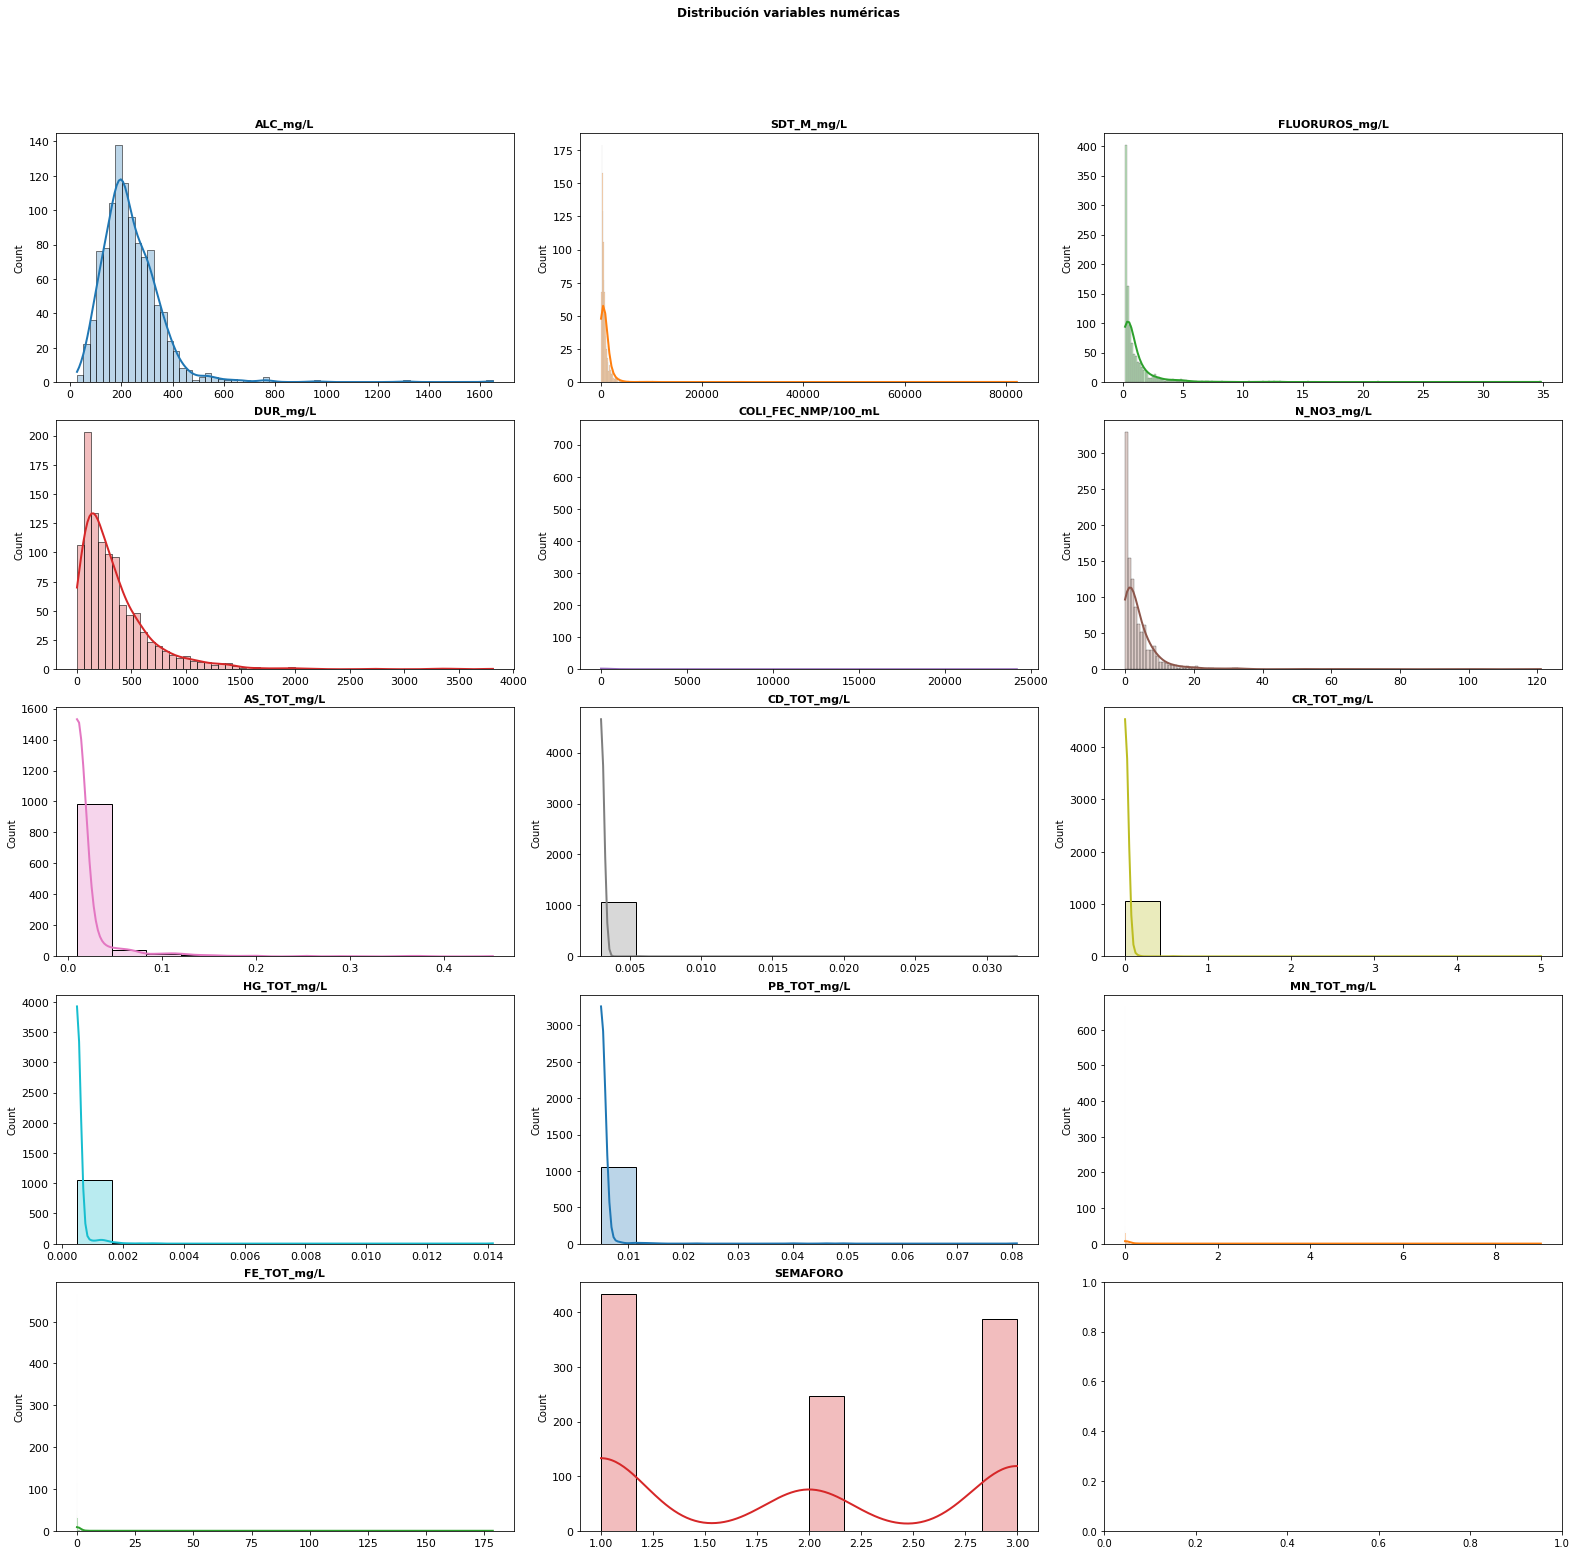

In [34]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(22, 22))
axes = axes.flat

for i, colum in enumerate(col_numericas):
    sns.histplot(
        data    = df_subterraneas,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 11, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

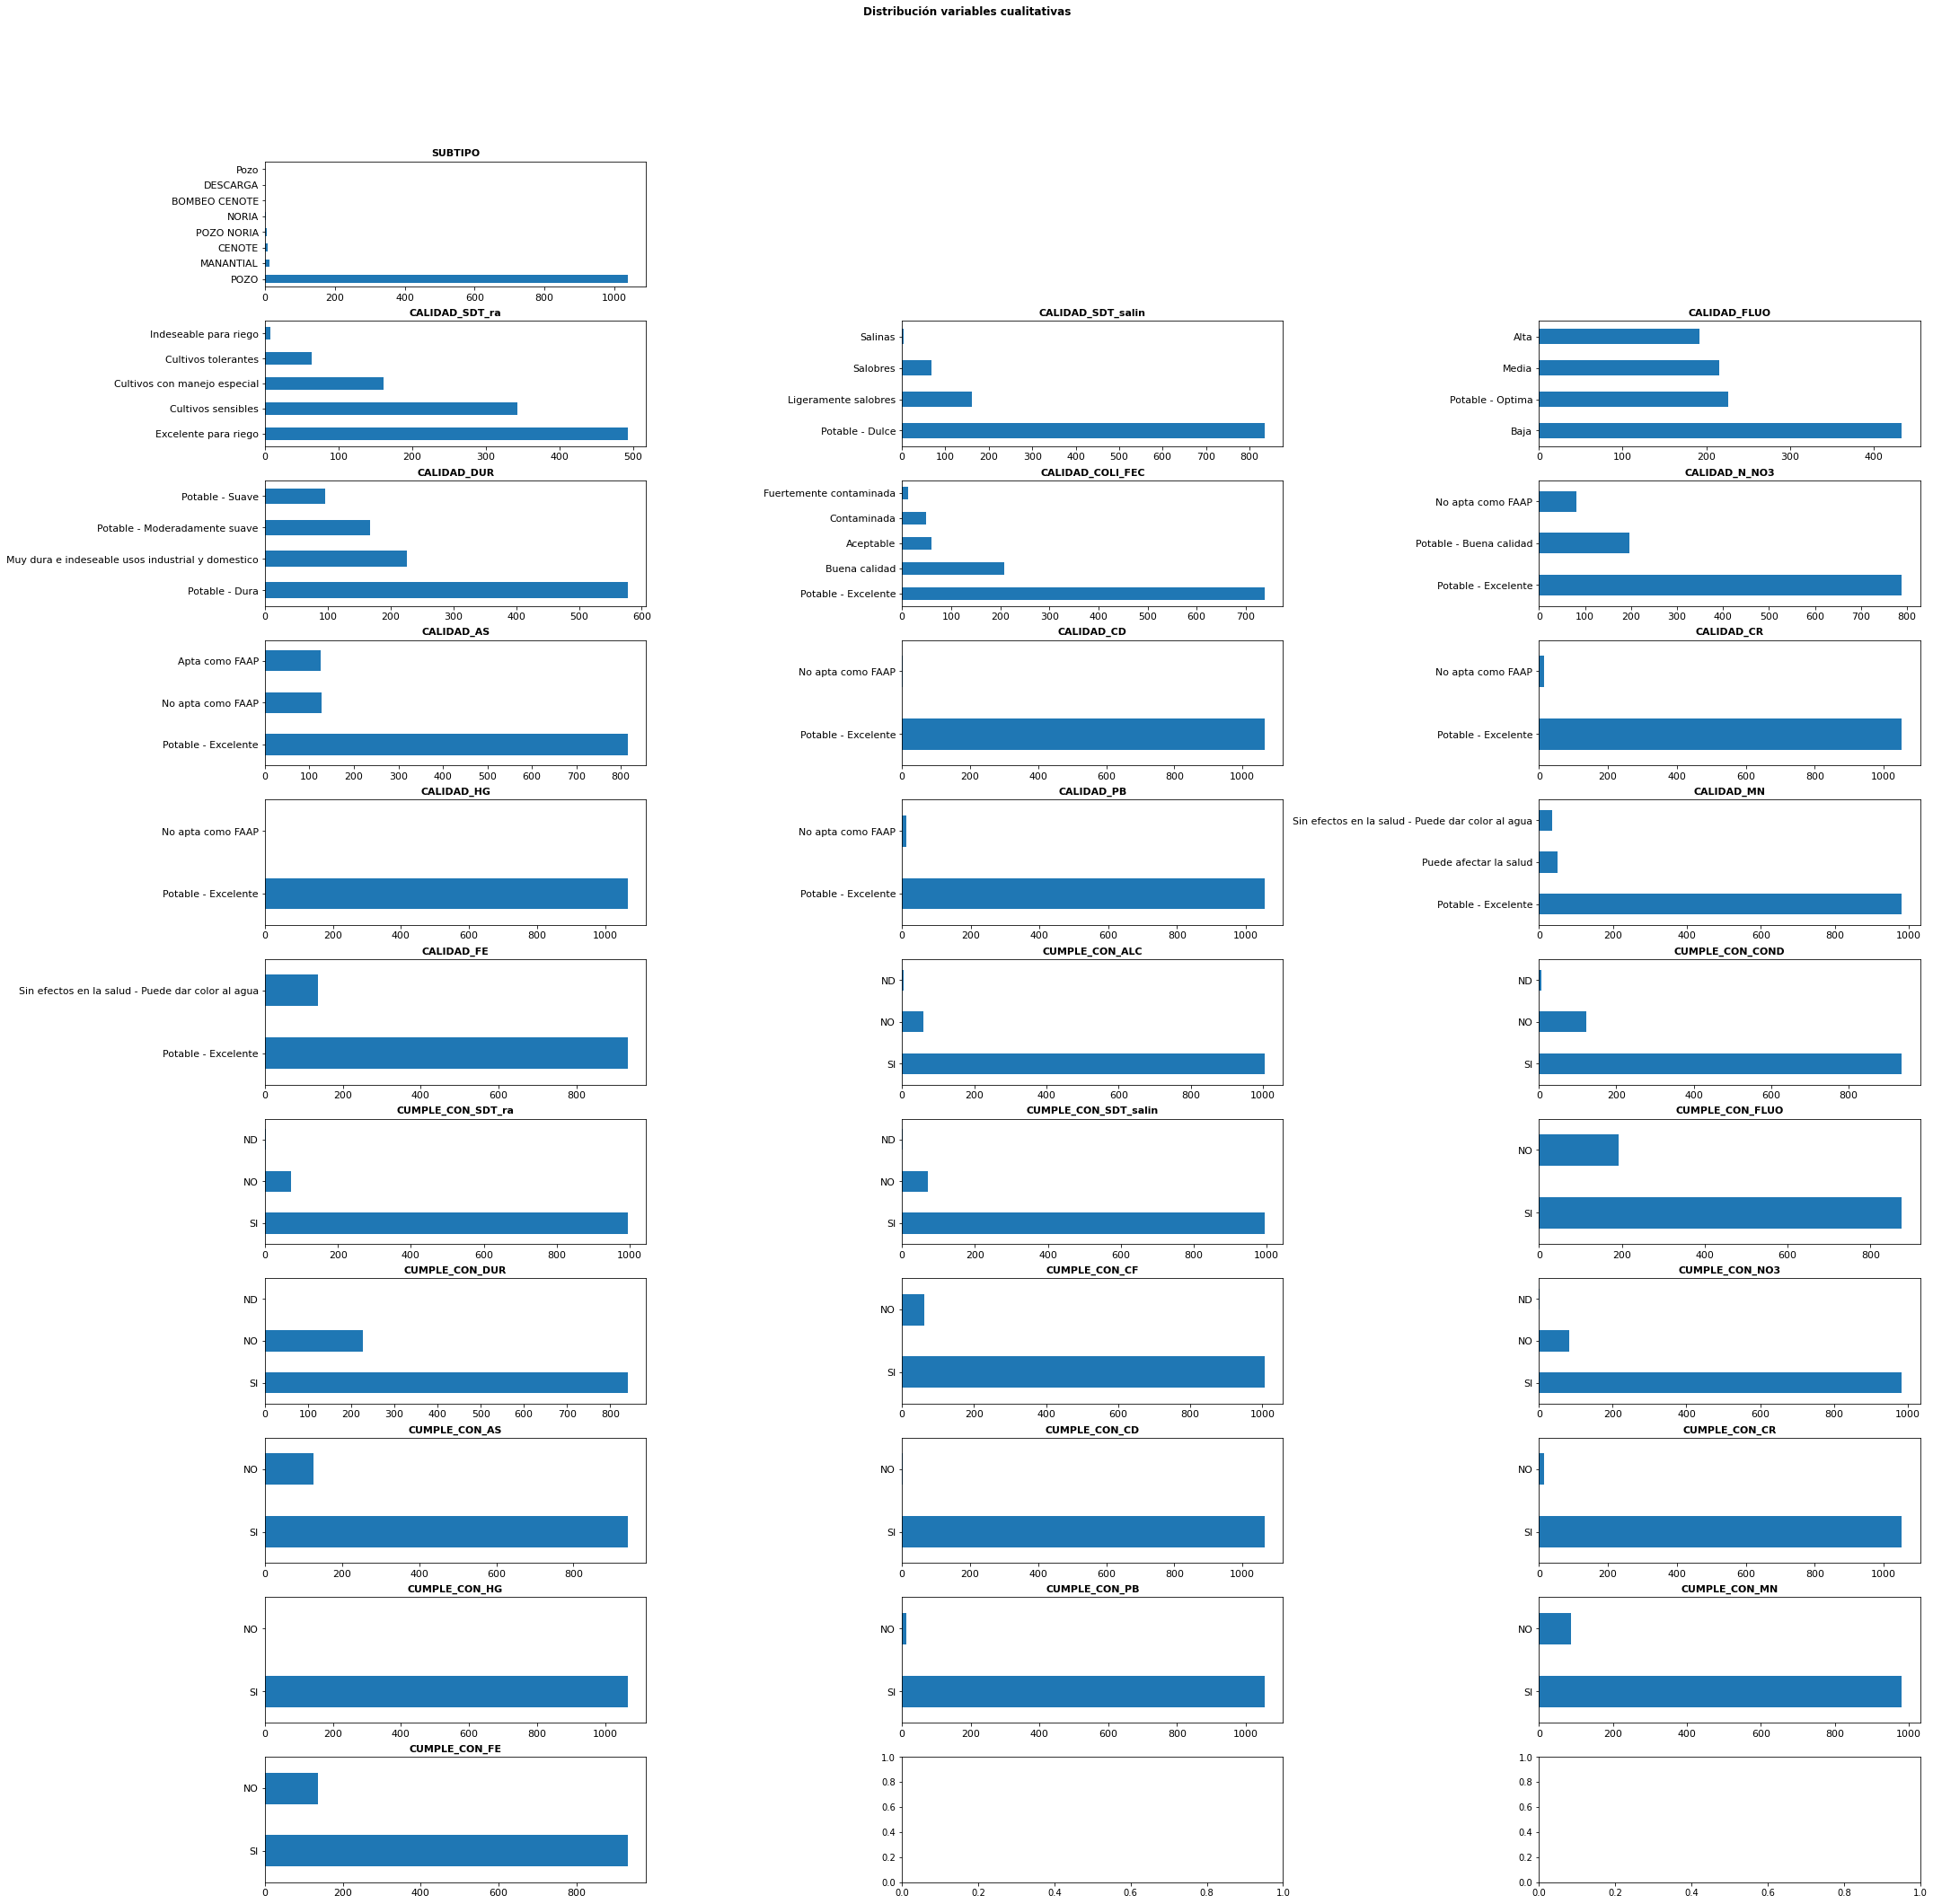

In [35]:
# Gráfico para cada variable categórica

fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(30, 30))
axes = axes.flat


for i, colum in enumerate(col_categoricas):
    df_subterraneas[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 11, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [1, 2]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas', fontsize = 12, fontweight = "bold");

###**Medidas de posición no centrales , los cuartiles , outliers**

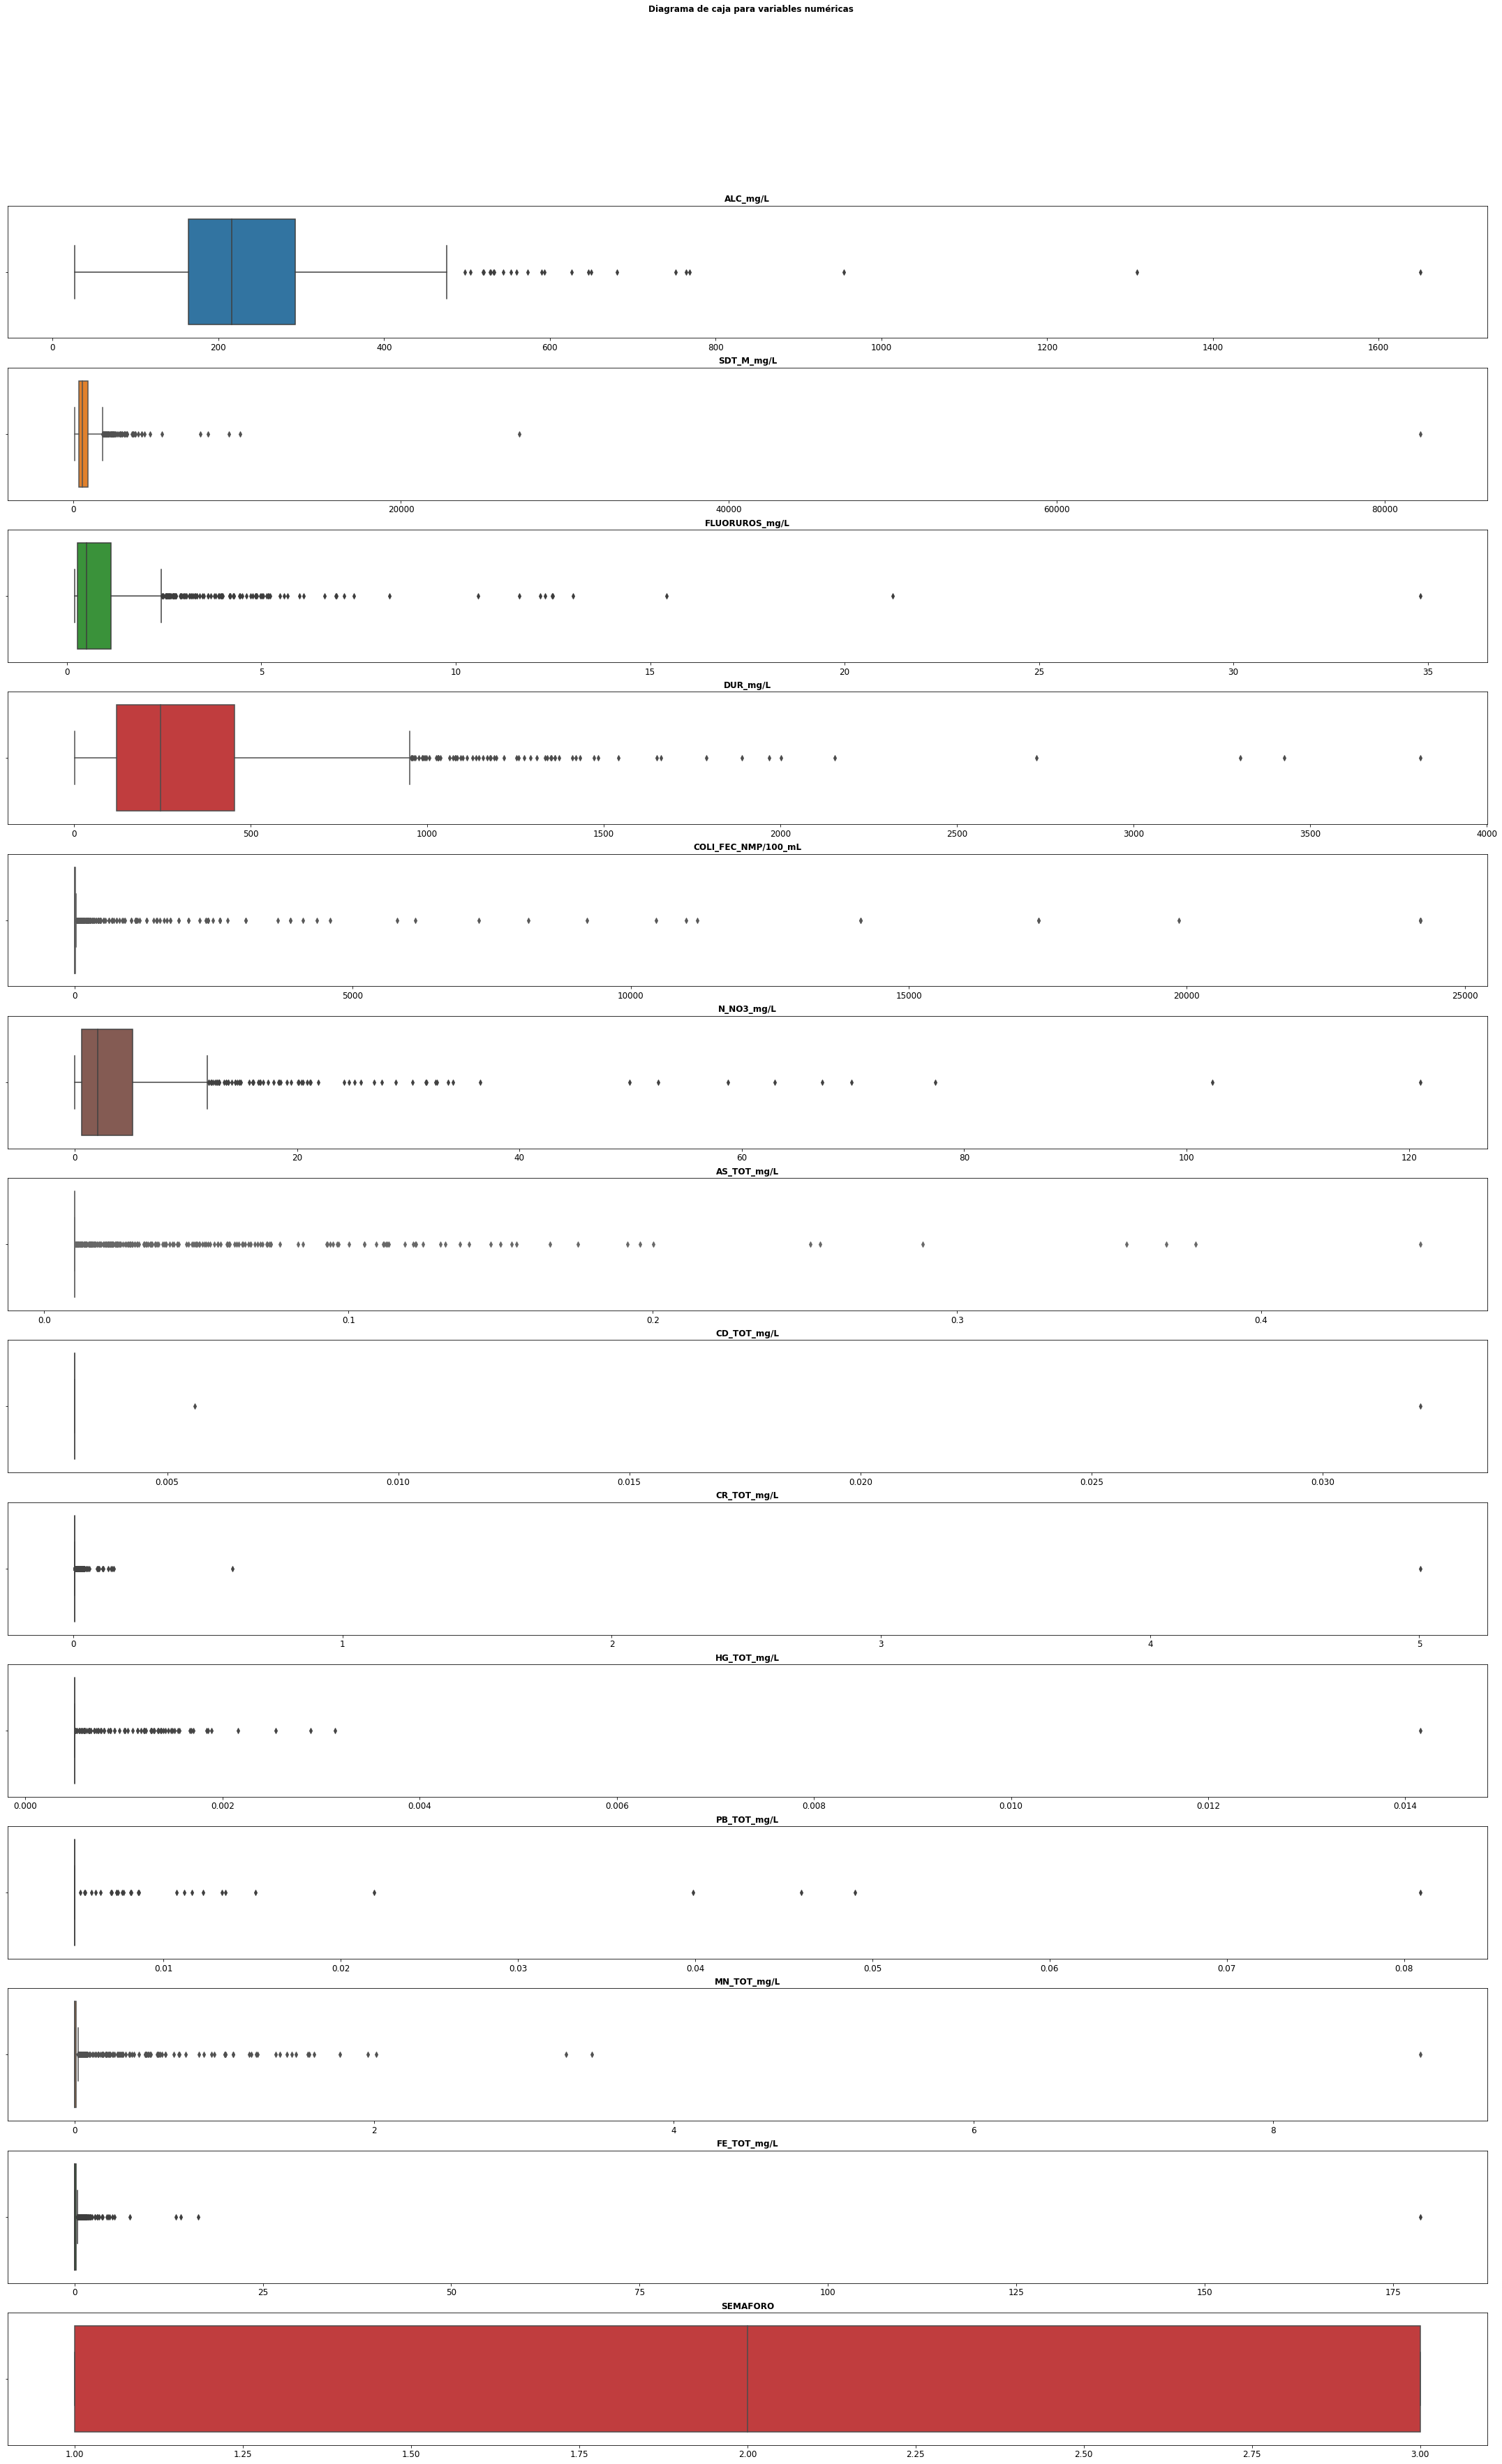

In [36]:
# Gráfico de caja y bigotes para cada variable numérica
fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(30, 50))
axes = axes.flat

for i, colum in enumerate(col_numericas):
    sns.boxplot(
        data    = df_subterraneas,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],   
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")  
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de caja para variables numéricas', fontsize = 12, fontweight = "bold");


###**Matriz de Correlación**

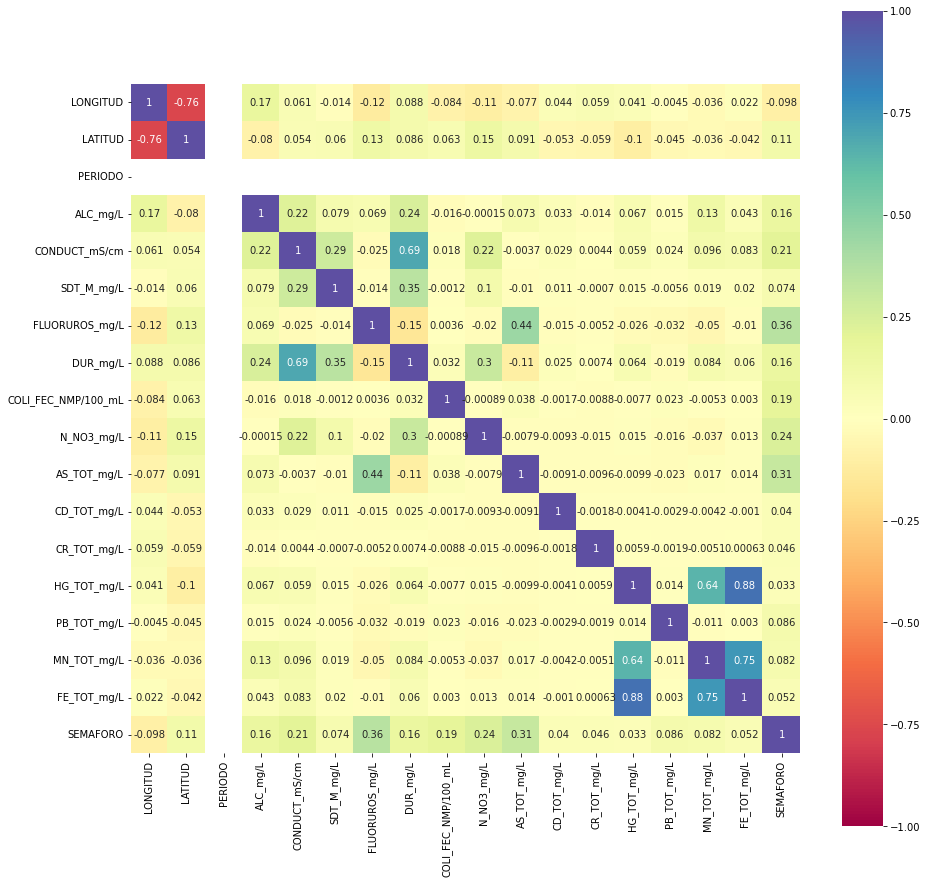

In [37]:
correlation_matrix  = df_subterraneas.corr(method='pearson')
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation_matrix,cmap='Spectral', annot=True, vmax = 1, vmin = -1, square = True,)

####**Observaciones**
- En general, al visualizar las gráficas anteriores podemos identificar que los datos tienen un sesgo bastante elevado.
- El dataset contiene en su mayoría variables categóricas, en total 32 variables categóricas y 13 variables numéricas.
- Podemos visualizar con las métricas estadísticas y con las gráficas de caja y bigote que en las variables numéricas hay demasiados outliers.
- Podemos observar que existe correlación entre las cantidades de los diferentes elementos químicos encontrados en el agua, por ejemplo MN_TOT_mg/L (cantidad de Magnesio) y FE_TOT_mg/L (Cantidad de hierro).


##**Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.**

In [38]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.5 MB/s 
     |████████████████████████████████| 1.0 MB 46.3 MB/s 
     |████████████████████████████████| 1.7 MB 58.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 45.6 MB/s 
     |████████████████████████████████| 6.3 MB 39.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=23605c219636c4b3f53012f432cbcff5b24b39f5915aaf6952c2cb89c1f3623e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d641868617e4dfd226881cd91328aebb2ac28ca24633fe284640c1e36900fa16
  Stored in directory: /root/.

In [39]:
from sklearn.cluster import KMeans
from shapely.geometry import Point
import geopandas as gpd

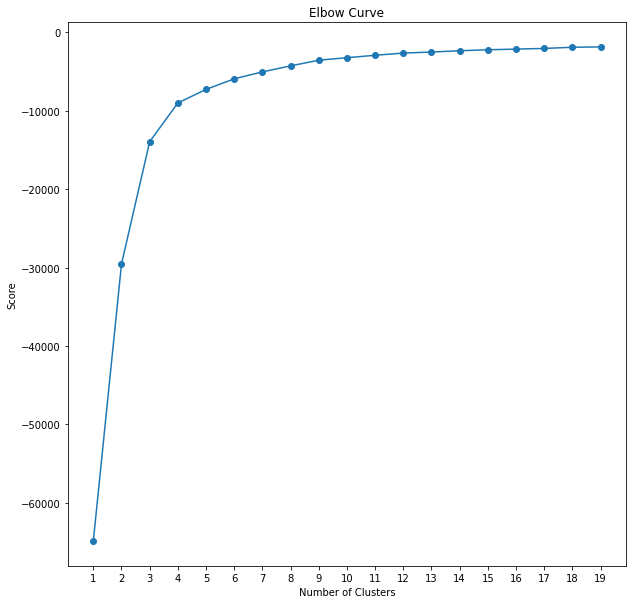

In [40]:
X = df_subterraneas[["LONGITUD","LATITUD","SEMAFORO"]]

Nc = range(1, 20, 1)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.subplots(figsize=(10,10))
plt.plot(Nc,score,marker='o')
plt.xlabel('Number of Clusters')
plt.xticks(Nc)
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Utilizamos la gráfica de Elbow para identificar el número de Clusters a utilizar. 

El mejor score obtenido es: 4

In [41]:
df_subterraneas["Coordinates"] = list(zip(df_subterraneas.LONGITUD, df_subterraneas.LATITUD))
df_subterraneas["Coordinates"] = df_subterraneas["Coordinates"].apply(Point)
df_subterraneas.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


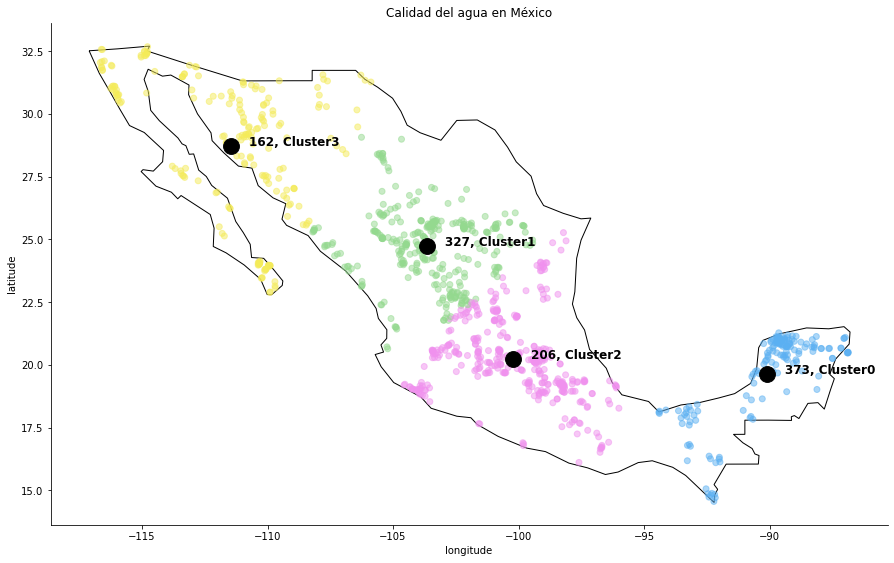

In [79]:
#importacion de mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

#definicion de best k
best_k=4
kmeans = KMeans(n_clusters=best_k, random_state=42).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

#
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

gdf = gpd.GeoDataFrame(df_subterraneas, geometry="Coordinates")
gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")


fig, gax = plt.subplots(figsize=(15,10))

colores = ['#5BB0F2','#94D98F','#F091EE','#F4EB59']

color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color=color_asig, alpha = 0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=250, alpha=1)

list_names_regions = ["Cluster0", "Cluster1", "Cluster2",  "Cluster3"]
list_stores_cluster = pd.DataFrame(labels).value_counts().to_list()
for i, txt in enumerate(list_stores_cluster):
    plt.annotate(str(txt)+ ", " + list_names_regions[i], (centroids[i,0], centroids[i,1]), xytext=(centroids[i,0]+0.7, centroids[i,1]), fontsize = 12, fontweight = "bold") 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

##**Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

In [52]:
labels_semaforo = gdf['SEMAFORO'].tolist()

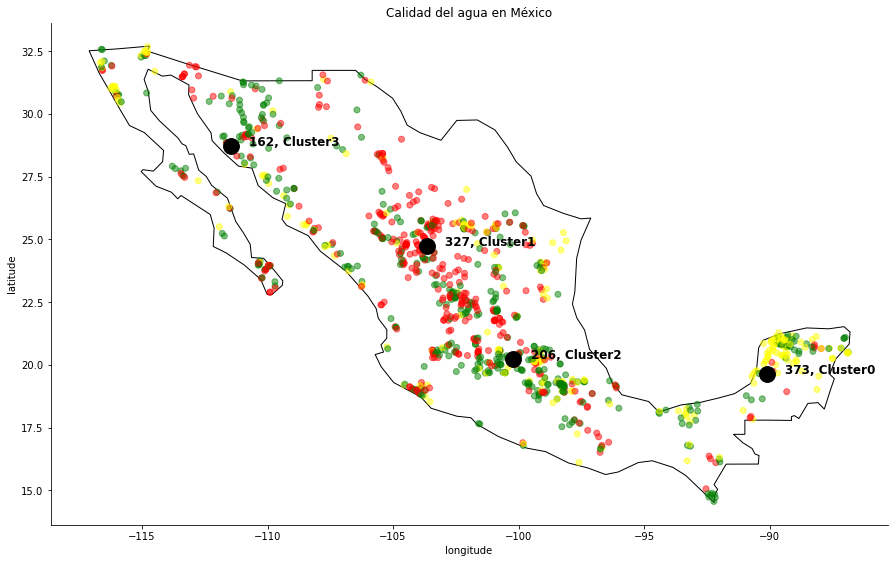

In [78]:
gdf = gpd.GeoDataFrame(df_subterraneas, geometry="Coordinates")

fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','yellow','red']

color_asig = []

for row in labels_semaforo:
  color_asig.append(colores[int(row-1)])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color=color_asig, alpha = 0.5, legend=True)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=250, alpha=1)

list_names_regions = ["Cluster0", "Cluster1", "Cluster2",  "Cluster3"]
list_stores_cluster = pd.DataFrame(labels).value_counts().to_list()
for i, txt in enumerate(list_stores_cluster):
    plt.annotate(str(txt)+ ", " + list_names_regions[i], (centroids[i,0], centroids[i,1]), xytext=(centroids[i,0]+0.7, centroids[i,1]), fontsize = 12, fontweight = "bold") 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [64]:
gdf["Cluster"] = labels
clusters_dict = {}
for i in range(4):
  if "Cluster"+str(i) not in clusters_dict:
      clusters_dict["Cluster"+str(i)] = []
  clusters_dict["Cluster"+str(i)] = gdf[gdf["Cluster"] == i].groupby(by="SEMAFORO")['SEMAFORO'].count()


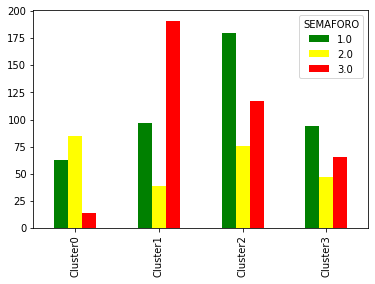

In [66]:
semaforo_df = pd.DataFrame(clusters_dict)
#semaforo_df.rename(columns = {"Cluster2":"Cluster 2", "Cluster3":"Cluster 3", "Cluster1":"Cluster 1", "Cluster0":"Cluster 0"}, inplace = True)
semaforo_df.transpose().plot.bar(color={2: "yellow", 3: "red", 1: "green"})

In [57]:
# Este dataframe nos ayuda a mapear nuestros valores del dataframe original con las etiquetas de kmeans
cluster_map = pd.DataFrame()
cluster_map['index'] = df_subterraneas.index.values
cluster_map['cluster_label'] = kmeans.labels_

# Este dataframe contiene lo del dataframe original, y una columna con la etiqueta de su centro correspondiente
df2 = df_subterraneas.reset_index()
df_centros = cluster_map.join(df2, on="index", lsuffix="_l", rsuffix="_r")
df_centros.drop(columns=['index_l', 'index_r'], inplace=True)

# Ahora agregamos al dataframe la coordenada del centro del cluster
for idx, cent in enumerate(kmeans.cluster_centers_):
  center_coord = f"{cent[1]},{cent[0]}"
  df_centros.loc[df_centros.cluster_label==idx, 'cluster_center_coord'] = center_coord

In [62]:
df_centros[df_centros['cluster_label']==2]['ESTADO'].unique()

array(['AGUASCALIENTES', 'COLIMA', 'MEXICO', 'GUANAJUATO', 'GUERRERO',
       'HIDALGO', 'MICHOACAN DE OCAMPO', 'PUEBLA', 'QUERETARO ARTEAGA',
       'SAN LUIS POTOSI', 'TLAXCALA', 'ZACATECAS', 'DISTRITO FEDERAL',
       'MORELOS', 'OAXACA', 'VERACRUZ DE IGNACIO DE LA LLAVE',
       'TAMAULIPAS', 'JALISCO'], dtype=object)

In [60]:
df_centros[df_centros['cluster_label']==0].head()

,cluster_label,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates,Cluster,cluster_center_coord
53,0,POZO DEL SISTEMA DE AGUA POTABLE DE CANDELARIA...,PENINSULA DE YUCATAN,CAMPECHE,CANDELARIA,PENINSULA DE YUCATAN,POZO,-91.04672,18.18680,2020,...,SI,SI,SI,SI,SI,SI,SI,POINT (-91.04672 18.18680),0,"19.6502625,-90.09271577777778"
54,0,POZO DEL SISTEMA DE AGUA POTABLE DE CHULBAC,PENINSULA DE YUCATAN,CAMPECHE,CAMPECHE,PENINSULA DE YUCATAN,POZO,-90.55914,19.74566,2020,...,SI,SI,SI,SI,SI,SI,SI,POINT (-90.55914 19.74566),0,"19.6502625,-90.09271577777778"
55,0,POZO 1 ORIENTE DE LA GALERIA FILTRANTE DE CHINA,PENINSULA DE YUCATAN,CAMPECHE,CAMPECHE,PENINSULA DE YUCATAN,POZO,-90.49801,19.77364,2020,...,SI,SI,SI,SI,SI,SI,SI,POINT (-90.49801 19.77364),0,"19.6502625,-90.09271577777778"
56,0,POZO DEL SISTEMA DE AGUA POTABLE DE UAYAMON,PENINSULA DE YUCATAN,CAMPECHE,CAMPECHE,PENINSULA DE YUCATAN,POZO,-90.42225,19.65788,2020,...,SI,SI,SI,SI,SI,SI,SI,POINT (-90.42225 19.65788),0,"19.6502625,-90.09271577777778"
57,0,POZO DEL SISTEMA DE AGUA POTABLE DE SEYBAPLAYA,PENINSULA DE YUCATAN,CAMPECHE,CHAMPOTON,PENINSULA DE YUCATAN,POZO,-90.65317,19.63013,2020,...,SI,SI,SI,SI,SI,SI,SI,POINT (-90.65317 19.63013),0,"19.6502625,-90.09271577777778"


##**Conclusiones**

Al analizar el dataset de aguas subterráneas y al implementar el algoritmo de K-means, vemos que sí hay relación entre la ubicación geográfica y la calidad del agua en México.

Para generar los clusters de K-means utilizamos tres variables: Longitud, Latitud y Semáforo.

Observamos que tiene más peso la ubicación geográfica para la generación de los epicentros de los clusters; sin embargo, visualizamos que K-means sí genera  los clusters considerando el volumen del tipo de clase del Semáforo.  Por ejemplo, en el Cluster 1 hay mayor presencia de Semáforo Rojo, mientras que en el Cluster 0 prevalece el Semáforo Amarillo.



